In [31]:
#!/usr/bin/python

In [32]:
!git clone https://github.com/st1800eafit/st1800_20211.git
!pip install nltk
!pip install stop-words

fatal: destination path 'st1800_20211' already exists and is not an empty directory.


In [33]:
import os
import glob
import re 
import nltk 
import matplotlib.pyplot as plt

In [34]:
# Importamos los documentos de entrada para trabajar
files_location = os.path.join("/","content","st1800_20211","datasets", "papers_sample_pdf/")
output_file_location = os.path.join("/","content/")
output_path = "./out/"
output_file = "text_prep.txt"
print(files_location)

/content/st1800_20211/datasets/papers_sample_pdf/


In [35]:
# Abrimos los documentos con extensiones .txt. Una vez tenemos todos los nombres de los documentos, los abrimos y adicionamos a la variable corpus
filenames = glob.glob(files_location+"*.txt")
corpus = ""
for file in filenames:
  corpus += open(file, "r").read()

In [36]:
# Abrimos el .xml. Primero tenemos que limpiar el xml de etiquetas, para luego agregarlo al corpus. En este momento tenemos al corpus totalmente actualizado
filename_xml = glob.glob(files_location+"*.xml")
xml_file = open (filename_xml[0], "r").read()
xml_file = re.sub('<[^>]*>', "", xml_file)
corpus += xml_file

In [37]:
# Importamos las librerias necesarias de nltk para filtrar el corpus que tenemos
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Inicialmente tenemos la siguiente cantidad de tokens: 356358


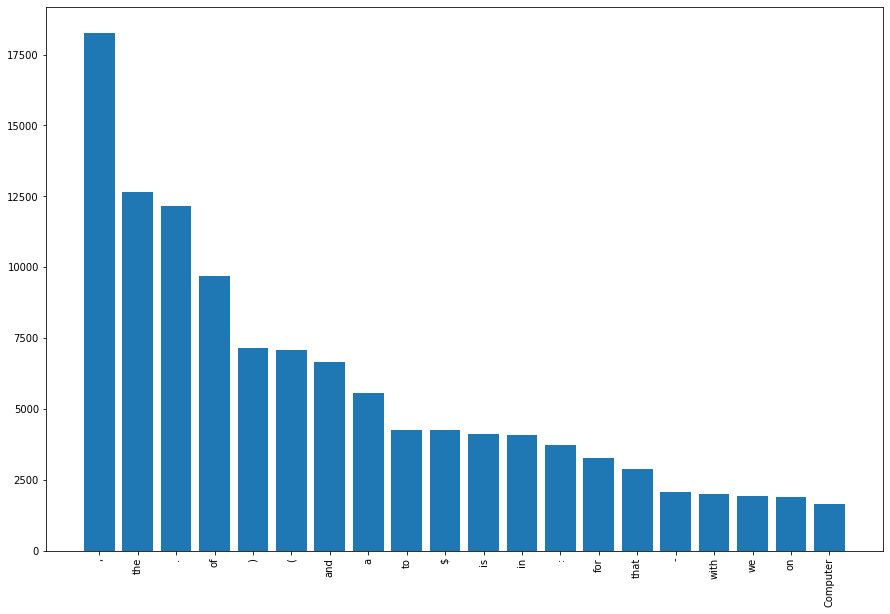

In [38]:
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer ,TreebankWordTokenizer
# Tokenizamos al corpus, por medio de ntlk usando word_tokenize. Tambien se observan otros modulos para tokenizar de NLTK

tokenizer_w = WhitespaceTokenizer()
tokenizer_punkt = WordPunctTokenizer()
tokenizer_tree = TreebankWordTokenizer()

#Forma 1
tokens_nltk = nltk.word_tokenize(corpus)
#Forma 2
#tokens_nltk = tokenizer_w.tokenize(corpus)
#Forma 3
#tokens_nltk = tokenizer_punkt.tokenize(corpus)
#Forma 4
#tokens_nltk = tokenizer_tree.tokenize(corpus)

print("Inicialmente tenemos la siguiente cantidad de tokens: " + str(len(tokens_nltk)))
fdist = nltk.FreqDist(tokens_nltk)
topwords = fdist.most_common(20)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [39]:
# Importamos y utilizamos los stop words de NLTK
from nltk.corpus import stopwords
stop_words_nltk = set(stopwords.words('english'))
print("La cantidad de stop words a utilizar con la libreria NLTK es: " + str(len(stop_words_nltk)))
print(stop_words_nltk)

La cantidad de stop words a utilizar con la libreria NLTK es: 179
{'it', 'an', 'on', 'm', 'such', 'be', 'here', 'whom', 'ourselves', 'through', 'the', 'didn', 'she', 'is', 'because', 'ain', "mightn't", "you're", 'with', 'hasn', 'being', 'were', 'so', 'myself', "needn't", 'same', 'before', 'most', 'themselves', 'against', 'ours', 'own', 'than', 'or', 'more', 'some', 'above', 'this', 'there', "she's", 'just', 'my', "that'll", 'mightn', 'why', 't', 'from', "shan't", 'as', 'at', 'doing', 'her', 'shouldn', 'was', 'ma', 'wouldn', 'but', 'after', 'needn', 'not', 'had', "hasn't", 'haven', 'mustn', 'too', 'a', 'yourself', 'for', 'if', "aren't", 'herself', "you've", 'weren', 'd', 've', 'to', "should've", 'did', 'off', 'hers', 'down', 'that', 'then', 'below', "wouldn't", "shouldn't", 'do', 'should', 'i', 'doesn', 'o', 'aren', 'once', 'very', 'about', 're', 'are', 'has', 's', 'which', 'wasn', 'his', 'their', 'out', 'both', "didn't", 'isn', 'been', 'your', 'until', 'again', 'now', "mustn't", "doesn

numero de palabras finales =  23309
[('computer', 1669), ('science', 1635), ('text', 1050), ('http', 1015), ('cs', 1011), ('oai', 980), ('information', 726), ('algorithm', 725), ('theory', 697), ('problem', 680), ('data', 675), ('comment', 657), ('time', 583), ('paper', 574), ('algorithms', 564), ('also', 547), ('', 541), ('show', 537), ('using', 531), ('number', 491)]


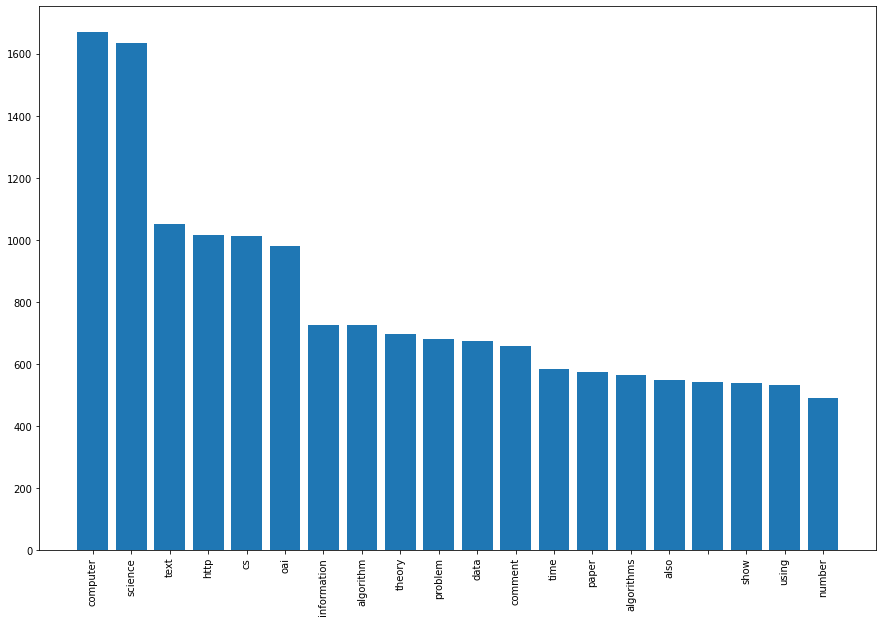

In [40]:
# Procedemos a remover los caracteres con longitud 1, que no sean alfa numericos y que no sean stop_words extraidos desde NLTK
tokens_nltk = [token.lower() for token in tokens_nltk if len(token)>1]
tokens_nltk = [re.sub(r'[^A-Za-z0-9]+','',token) for token in tokens_nltk]
tokens_nltk = [token for token in tokens_nltk if token not in stop_words_nltk]

fdist = nltk.FreqDist(tokens_nltk)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  18982
[('comput', 2613), ('scienc', 1662), ('algorithm', 1321), ('use', 1260), ('text', 1057), ('http', 1030), ('cs', 1011), ('problem', 990), ('oai', 980), ('code', 957), ('graph', 794), ('result', 771), ('inform', 764), ('model', 742), ('theori', 711), ('time', 688), ('network', 687), ('data', 676), ('show', 676), ('comment', 668)]


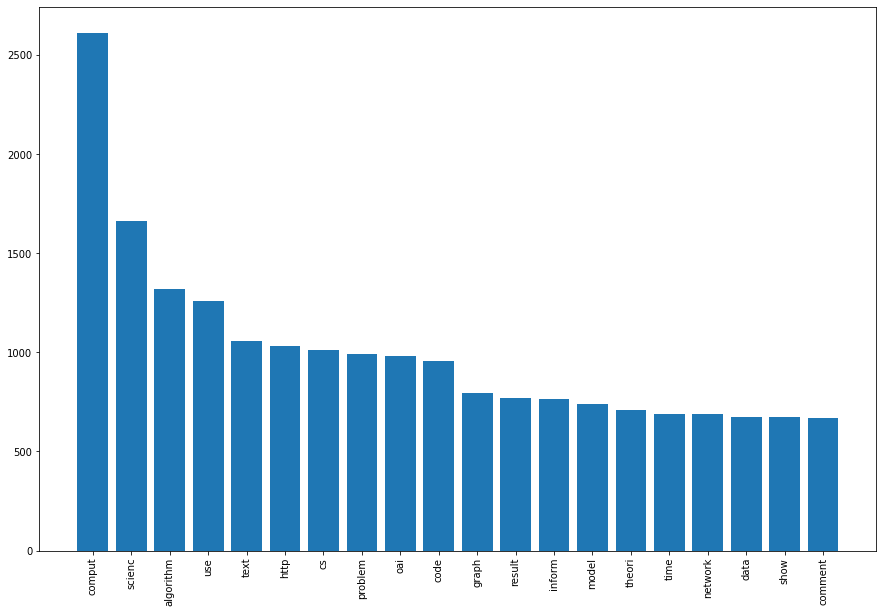

In [41]:
# Ahora procedemos a realizar el Stemming pero por medio de la libreria NLTK. En este caso tomaremos el Stemming de Porter
from nltk.stem import PorterStemmer

Porter_Stemmer = PorterStemmer()
tokens_nltk = [Porter_Stemmer.stem(token) for token in tokens_nltk]

fdist = nltk.FreqDist(tokens_nltk)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  18948
[('comput', 2613), ('scienc', 1662), ('algorithm', 1321), ('use', 1260), ('c', 1209), ('text', 1057), ('http', 1030), ('problem', 990), ('oai', 980), ('code', 957), ('graph', 794), ('result', 771), ('inform', 764), ('model', 742), ('theori', 711), ('time', 688), ('network', 687), ('data', 676), ('show', 676), ('comment', 668)]


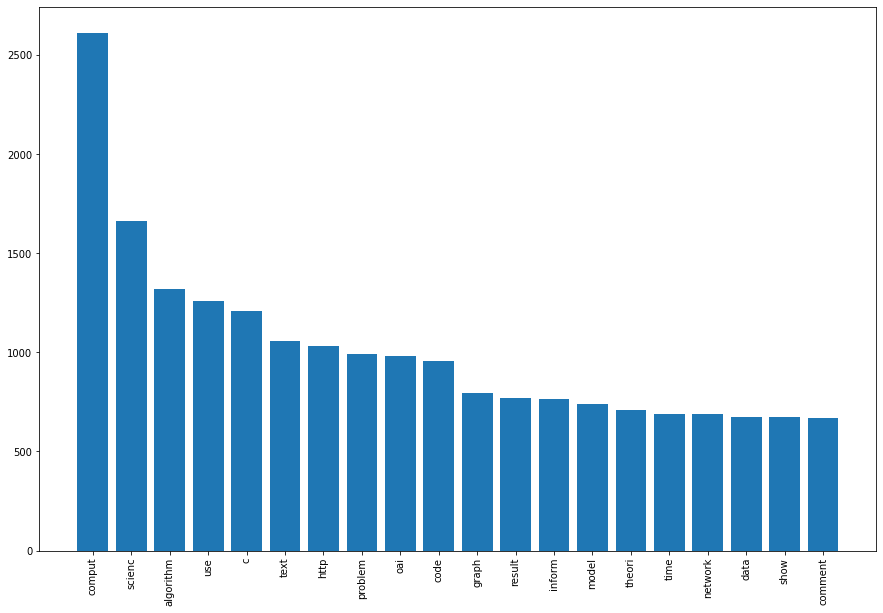

In [42]:
# Luego procedemos a hacer la Lemmatizacion, utilizando el metodo WordNet
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

tokens_nltk = [wordnet_lemmatizer.lemmatize(tokens) for tokens in tokens_nltk]

fdist = nltk.FreqDist(tokens_nltk)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Aplicando un metodo para extraer grams de 2 (union de dos tokens), tendriamos este numero de ocurrencias: 5292


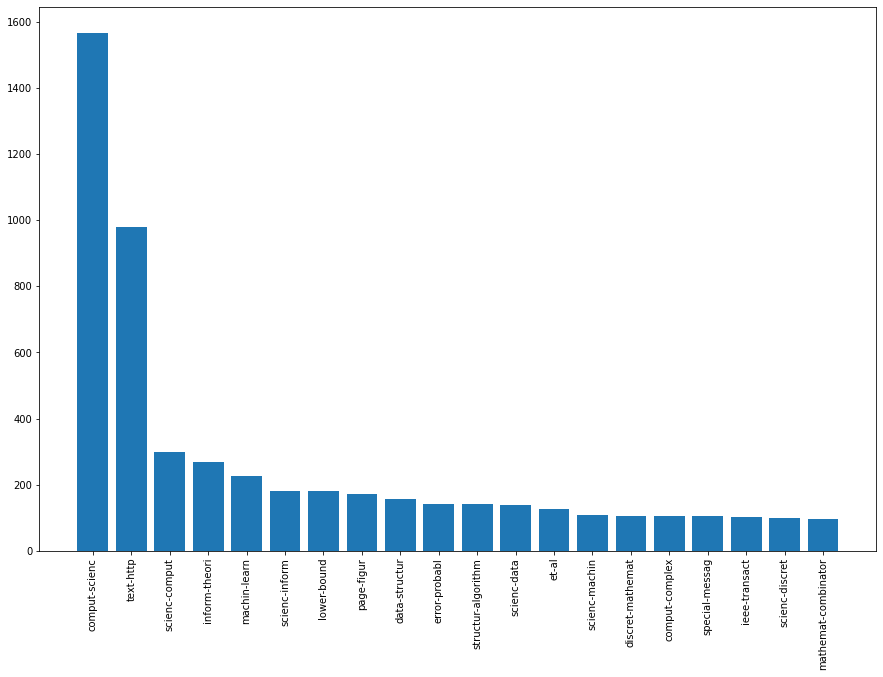

In [43]:
# Ahora vamos intentar representar los tokens en combinaciones de ellos por medio de N-Gram implementados en NLTK
from nltk import ngrams

n_gram_parameter = 2

tokens_nltk_ngrams = ngrams(tokens_nltk, n_gram_parameter)
fdist = nltk.FreqDist(tokens_nltk_ngrams)
topwords = fdist.most_common(20)
gram,occurrency = zip(*topwords)
print("Aplicando un metodo para extraer grams de 2 (union de dos tokens), tendriamos este numero de ocurrencias: "+ str(sum(occurrency)))
gram_str = list(map(lambda x: '-'.join(x), gram))
plt.figure(figsize=(15,10))
plt.bar(gram_str,occurrency)
plt.xticks(rotation=90)
plt.show()

Aplicando un metodo para extraer grams de 3 (union de dos tokens), tendriamos este numero de ocurrencias: 2169


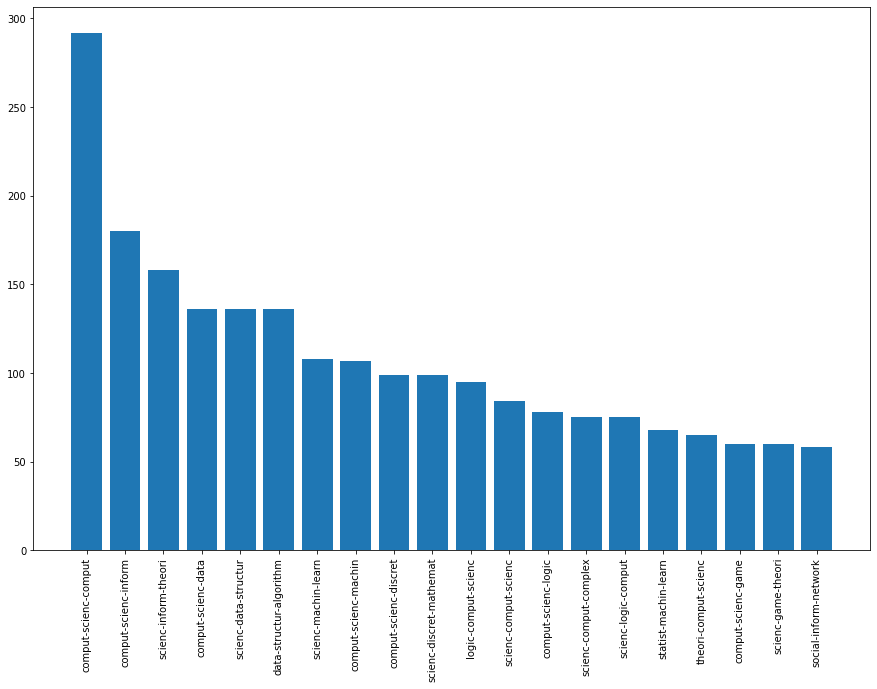

In [44]:
# Ahora vamos intentar representar los tokens en combinaciones de ellos por medio de N-Gram implementados en NLTK
from nltk import ngrams

n_gram_parameter = 3

tokens_nltk_ngrams = ngrams(tokens_nltk, n_gram_parameter)
fdist = nltk.FreqDist(tokens_nltk_ngrams)
topwords = fdist.most_common(20)
gram,occurrency = zip(*topwords)
print("Aplicando un metodo para extraer grams de 3 (union de dos tokens), tendriamos este numero de ocurrencias: "+ str(sum(occurrency)))
gram_str = list(map(lambda x: '-'.join(x), gram))
plt.figure(figsize=(15,10))
plt.bar(gram_str,occurrency)
plt.xticks(rotation=90)
plt.show()

In [45]:
# Finalmente podemos guardar el ultimo bag of word optimo, para no tenerlo que procesar cada vez que se necesiten
with open(output_file_location+output_file, 'w') as output_file:
    for token in tokens_nltk:
        output_file.write("%s\n" % token)